# P1 - Identificando personas desde una imagen de su cara

Elaborado por GRUPO 1:

- Juanita Piraban Barbosa - 201216313
- Lorena Morales Rodríguez - 202027957
- Alejandro Barinas Guio - 201628859
- Jaime Humberto Trujillo Perea - 201920366
- Alexander Zapata Galindo - 201425426

In [1]:
# Librerías
from sklearn.datasets import fetch_lfw_people
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from keras import models
from keras import layers

import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np

In [147]:
# DataSet
lfw_people = fetch_lfw_people(min_faces_per_person=0, resize=0.5)
list(lfw_people.keys())

['data', 'images', 'target', 'target_names', 'DESCR']

In [26]:
# Images
lfw_people.images.shape

(13233, 62, 47)

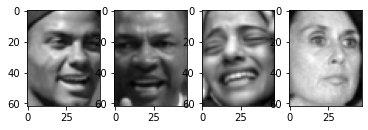

In [28]:
# Ejemplos
plt.subplot(141)
plt.imshow(lfw_people.images[8], cmap=plt.get_cmap('gray'))
plt.subplot(142)
plt.imshow(lfw_people.images[13], cmap=plt.get_cmap('gray'))
plt.subplot(143)
plt.imshow(lfw_people.images[22], cmap=plt.get_cmap('gray'))
plt.subplot(144)
plt.imshow(lfw_people.images[5], cmap=plt.get_cmap('gray'))
# show plot
plt.show()


In [65]:
# images and labels
X = lfw_people.images
y = lfw_people.target
target_names = lfw_people.target_names

In [66]:
X.shape

(13233, 62, 47)

In [67]:
y.shape

(13233,)

In [86]:
# split into a training and testing set
X_train_image, X_test_image, y_train_labels, y_test_labels = train_test_split(
    X, y, test_size=0.25, random_state=42)

In [87]:
#shape
X_train_image.shape

(9924, 62, 47)

In [88]:
#shape
X_test_image.shape

(3309, 62, 47)

In [150]:
# Transformacion
#X_train_image = X_train_image.reshape((9924, 62 * 47))
X_train_image = X_train_image.astype('float32') / 255
#X_test_image = X_test_image.reshape((3309, 62 * 47))
X_test_image = X_test_image.astype('float32') / 255

In [99]:
# Categorizar datos 
y_train_labels = to_categorical(y_train_labels)
y_test_labels = to_categorical(y_test_labels)

In [100]:
y_train_labels.shape

(9924, 5749)

In [101]:
y_test_labels.shape

(3309, 5744)

### MODELO 1

In [152]:
model_1 = models.Sequential()
model_1.add(layers.Dense(2914, activation='relu', input_shape=(62 * 47,)))
model_1.add(layers.Dense(5749, activation='softmax'))
model_1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [153]:
model_1.fit(X_train_image, y_train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: in user code:

    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:830 train_function  *
        return step_function(self, iterator)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:813 run_step  *
        outputs = model.train_step(data)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:770 train_step  *
        y_pred = self(x, training=True)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 2914 but received input with shape (None, 62, 47)


In [154]:
test_loss, test_acc = model_1.evaluate(X_test_image, y_test_labels)

ValueError: in user code:

    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1298 test_function  *
        return step_function(self, iterator)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1282 run_step  *
        outputs = model.test_step(data)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py:1241 test_step  *
        y_pred = self(x, training=False)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/alexander/opt/anaconda3/lib/python3.8/site-packages/keras/engine/input_spec.py:248 assert_input_compatibility  *
        raise ValueError(

    ValueError: Input 0 of layer sequential_7 is incompatible with the layer: expected axis -1 of input shape to have value 2914 but received input with shape (None, 62, 47)
